C:\Users\user\Desktop\Lab\strategy\strategies\super_guppy.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trend'] = np.select([c1, c2], [1, -1], 0)
C:\Users\user\Desktop\Lab\strategy\strategies\super_guppy.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fast_trend'] = self.check_parallelism(df[[f'ema{i}' for i in range(3, 24, 2)]])
C:\Users\user\Desktop\Lab\strategy\strategies\super_guppy.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

OPEN DATETIME        CLOSE DATETIME       SYMBOL      SIDE    LEVERAGE    TRADED QUANTITY    TRADED MARGIN    OPEN PRICE    CLOSE PRICE    REALIZED PROFIT    FEE    PROFIT
-------------------  -------------------  --------  ------  ----------  -----------------  ---------------  ------------  -------------  -----------------  -----  --------
2020-01-03 03:30:00  2020-01-04 03:30:00  BTC-USDT      -1           1             -0.136           946.88       6962.34        7341.6           -51.5794    0.78     -5.45
2020-01-30 03:30:00  2020-02-05 03:30:00  BTC-USDT       1           1              0.107           996.3        9311.23        9198.32          -12.0814    0.79     -1.21
2020-02-06 03:30:00  2020-02-16 03:30:00  BTC-USDT       1           1              0.102           982.26       9630           9914.31           28.9996    0.79      2.95
2020-02-19 03:30:00  2020-02-20 03:30:00  BTC-USDT       1           1              0.1            1017.45      10174.5         9593.31     

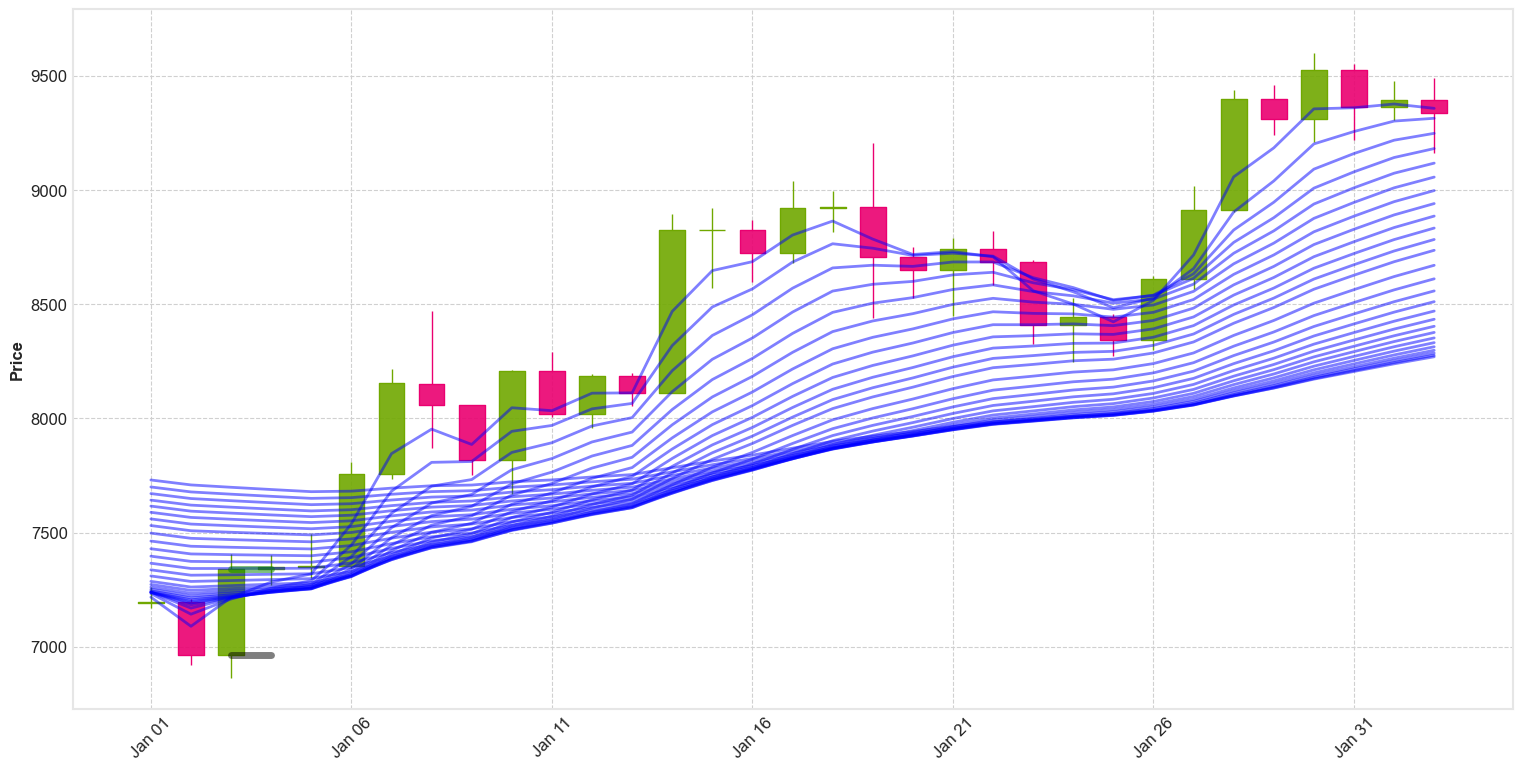

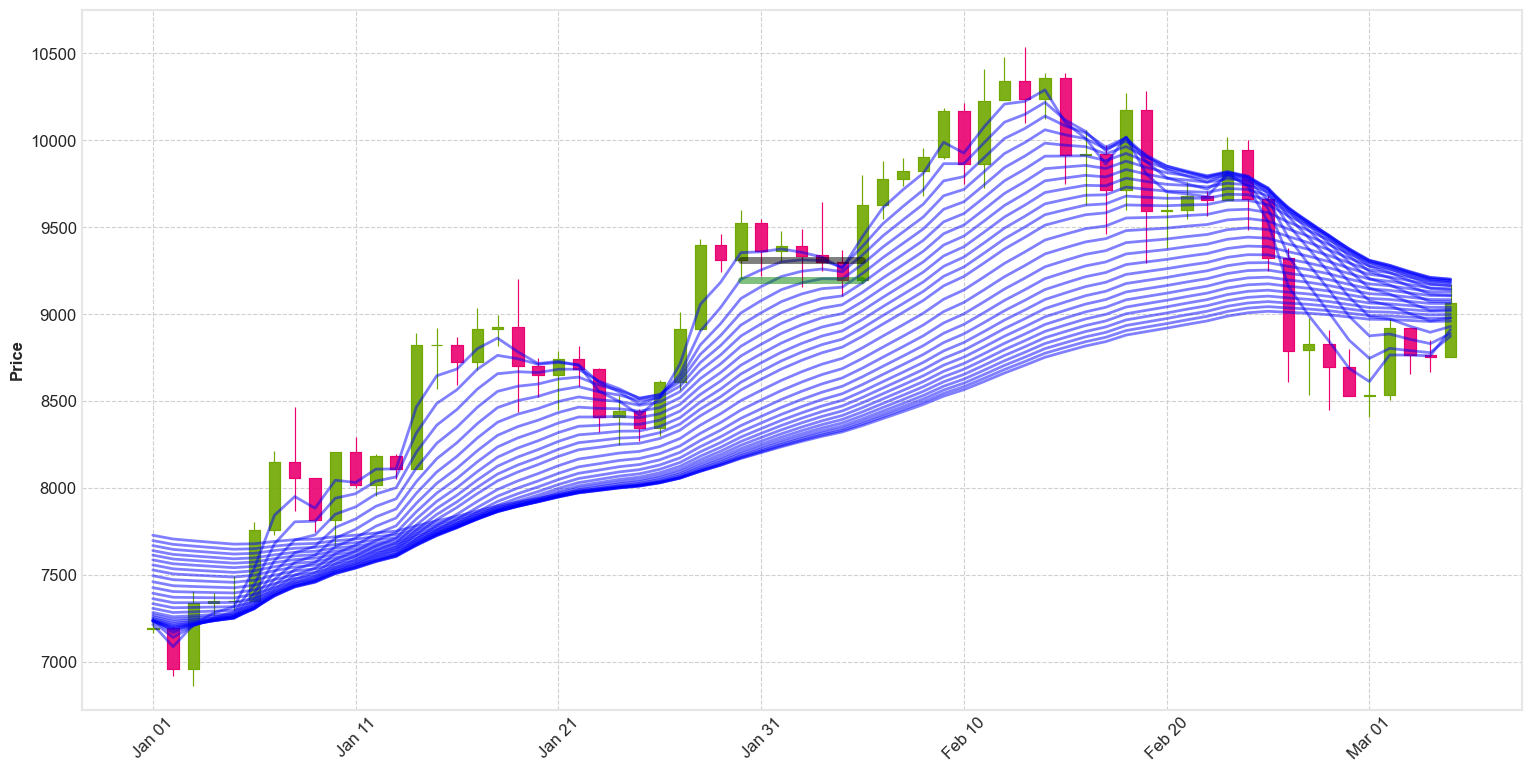

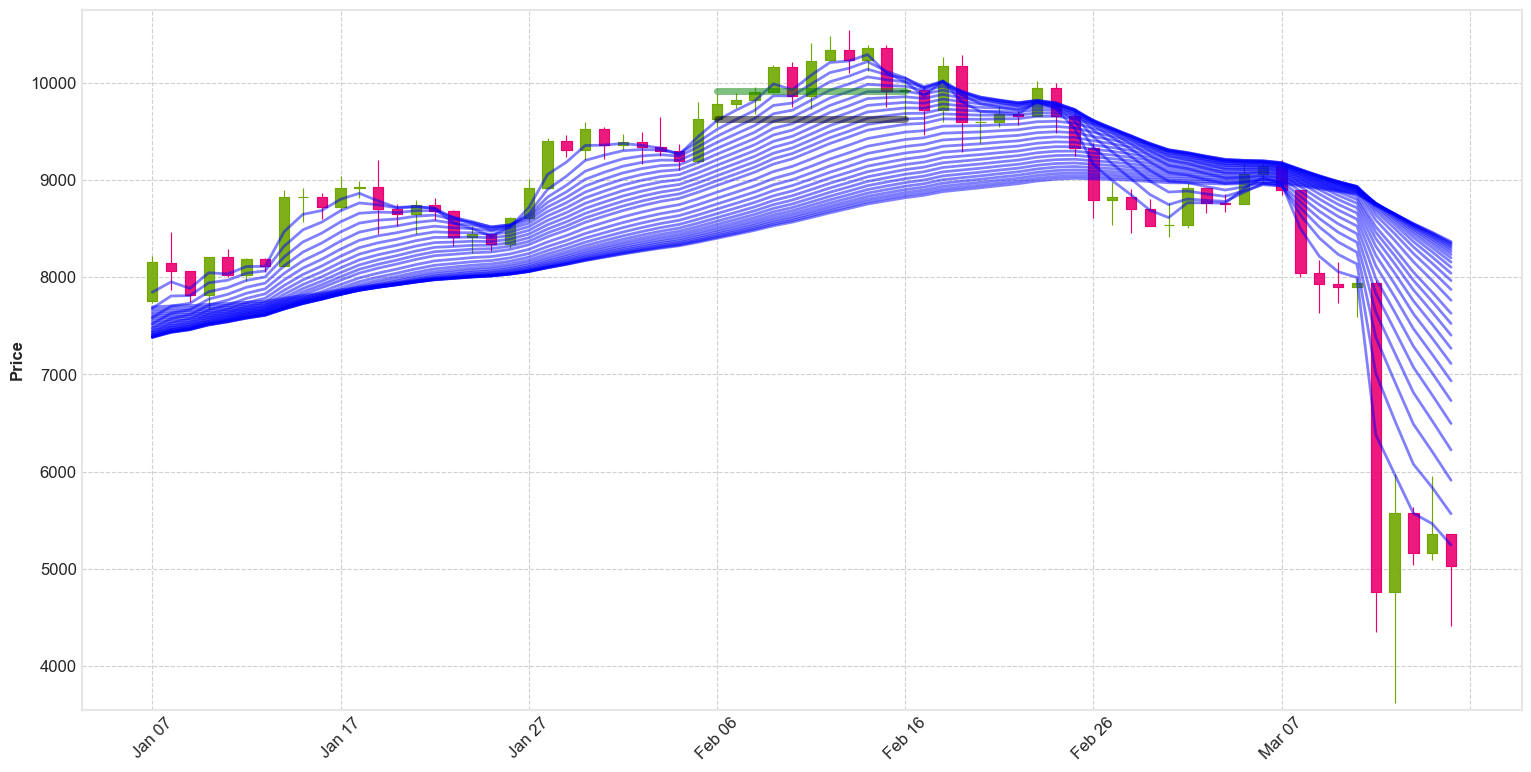

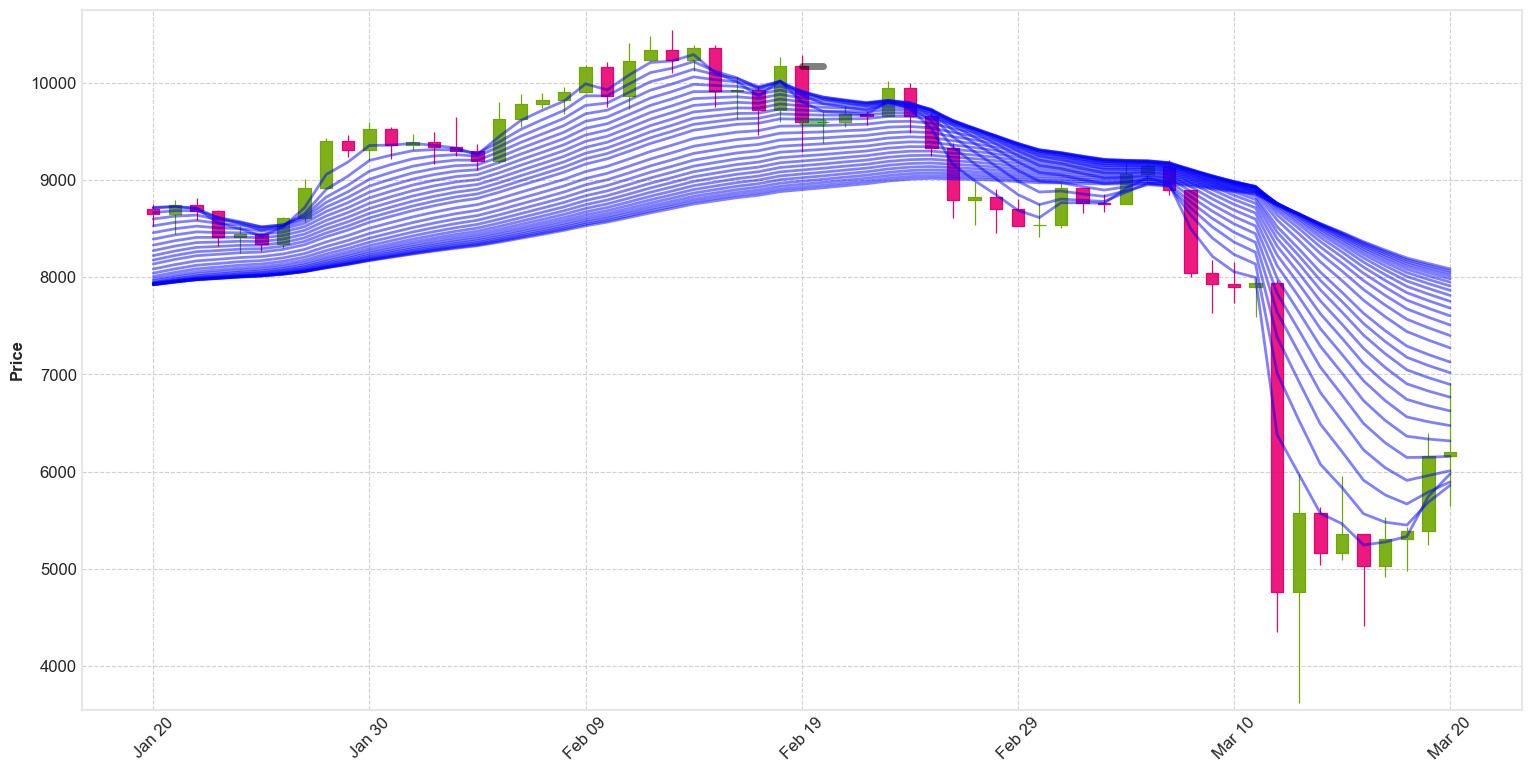

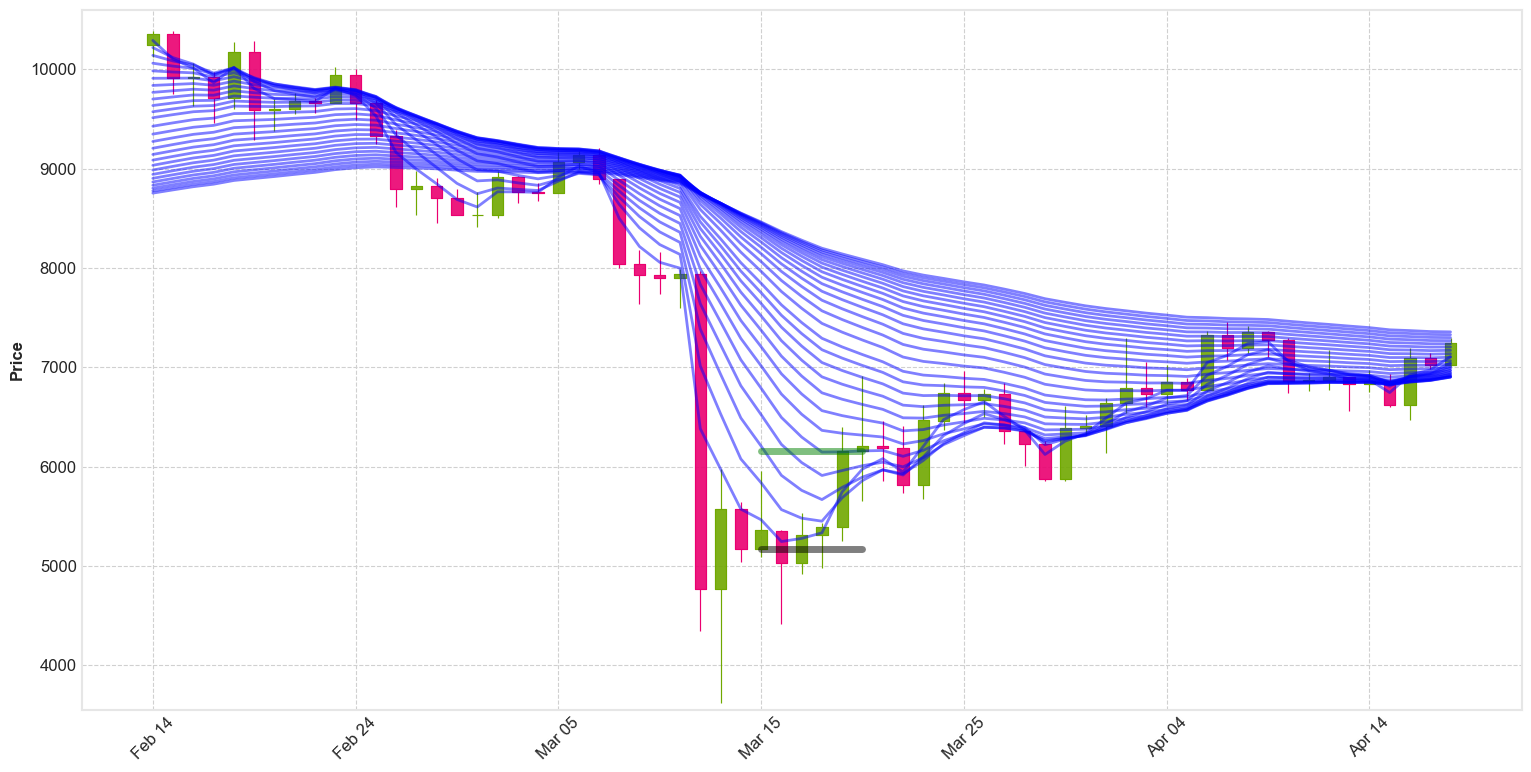

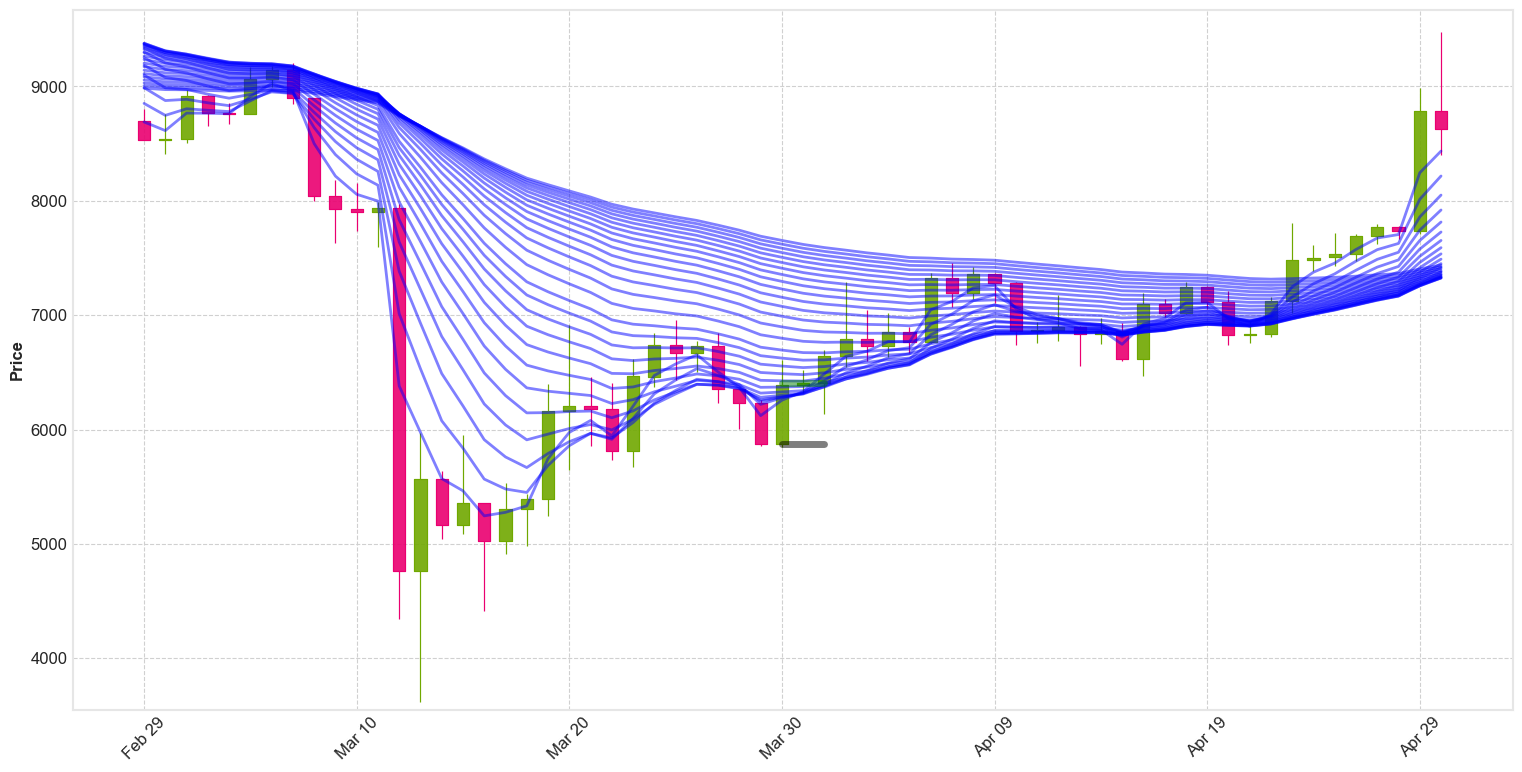

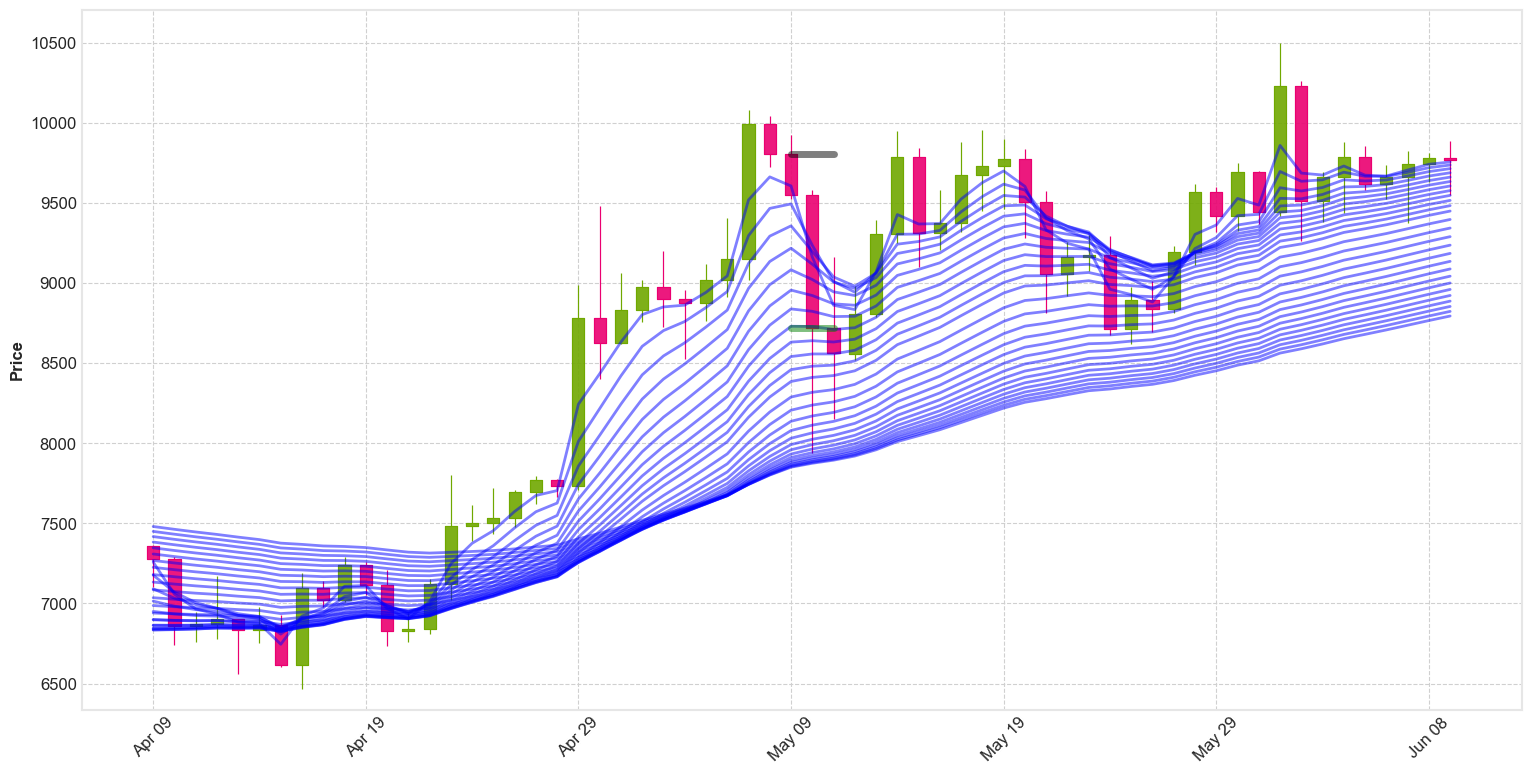

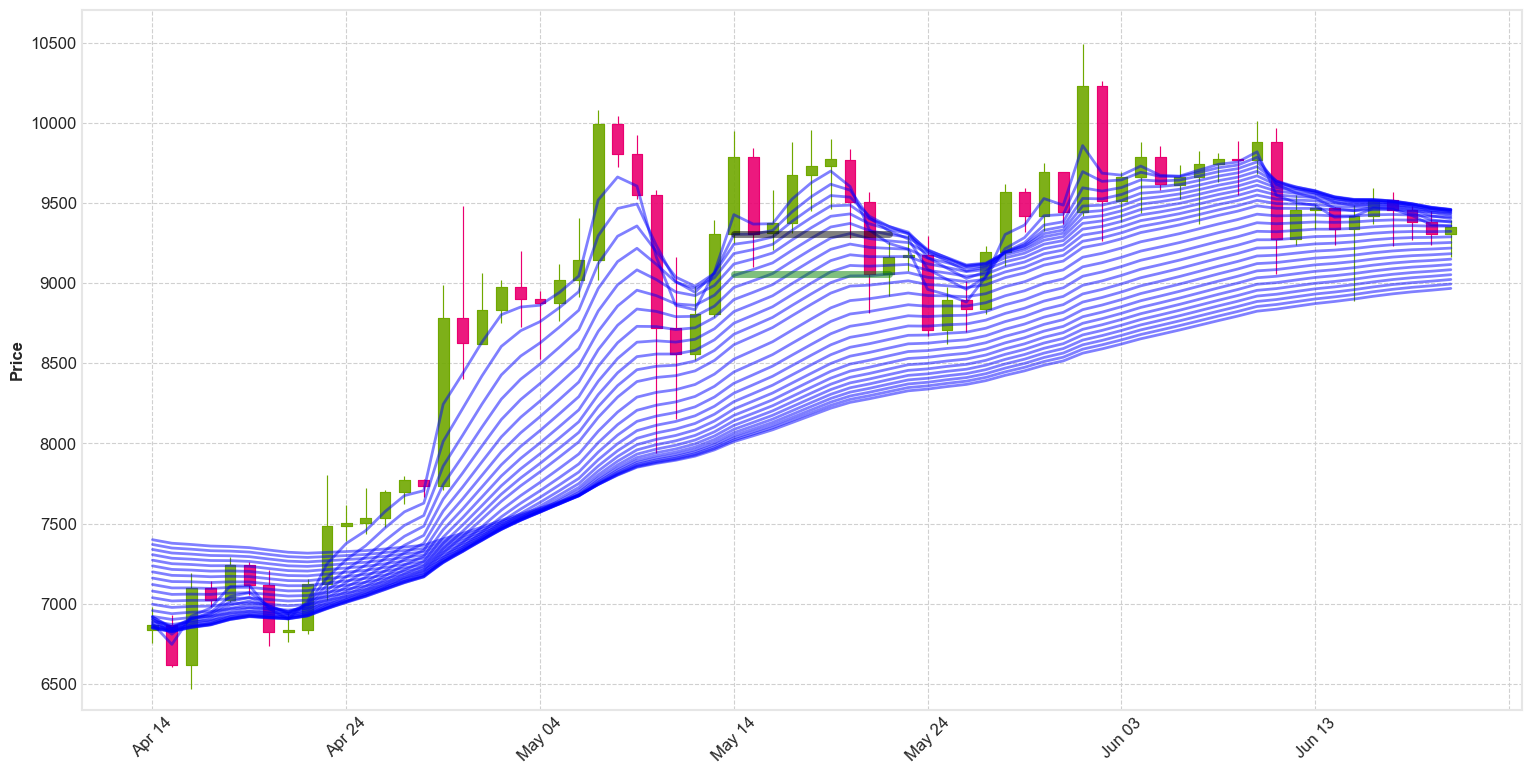

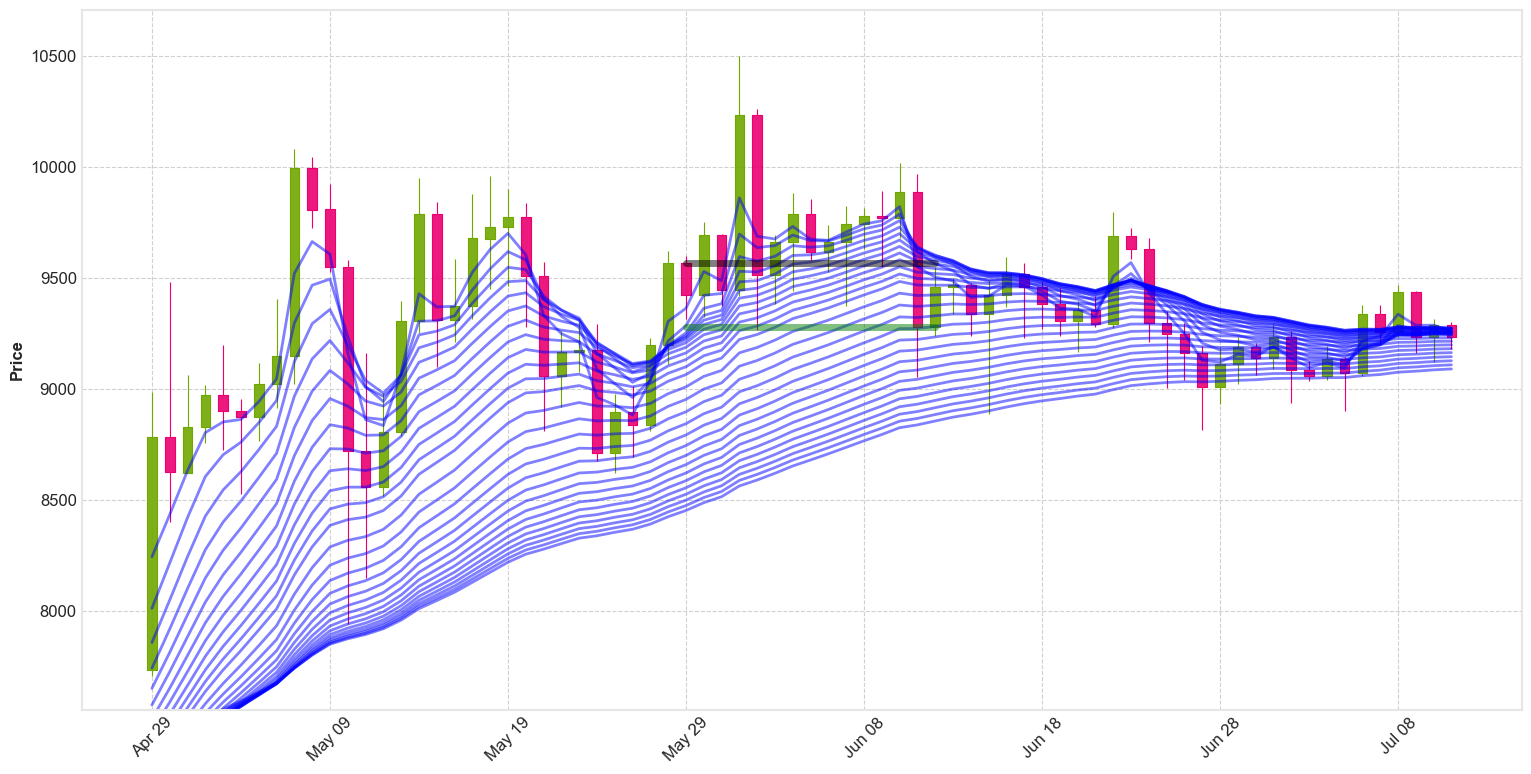

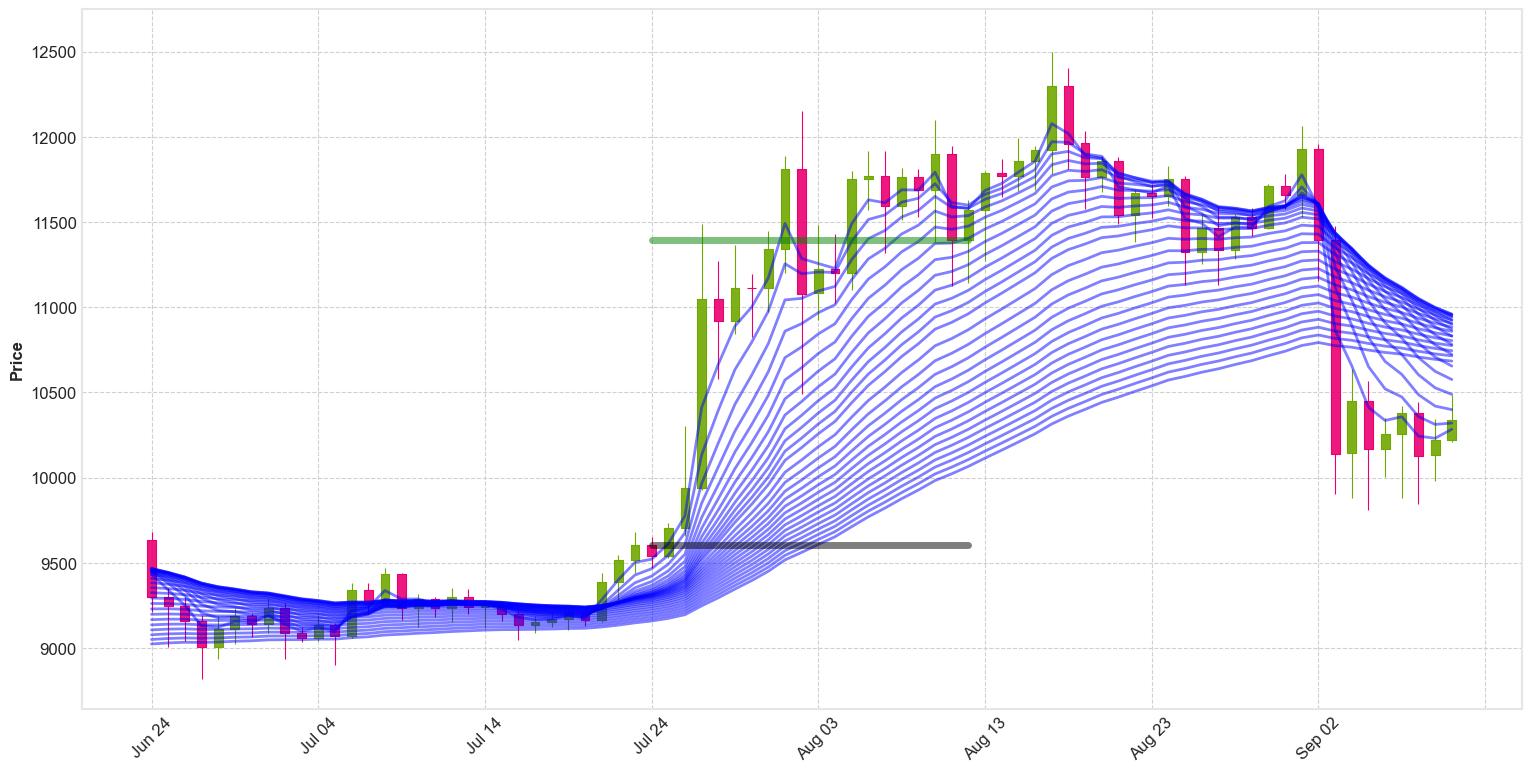

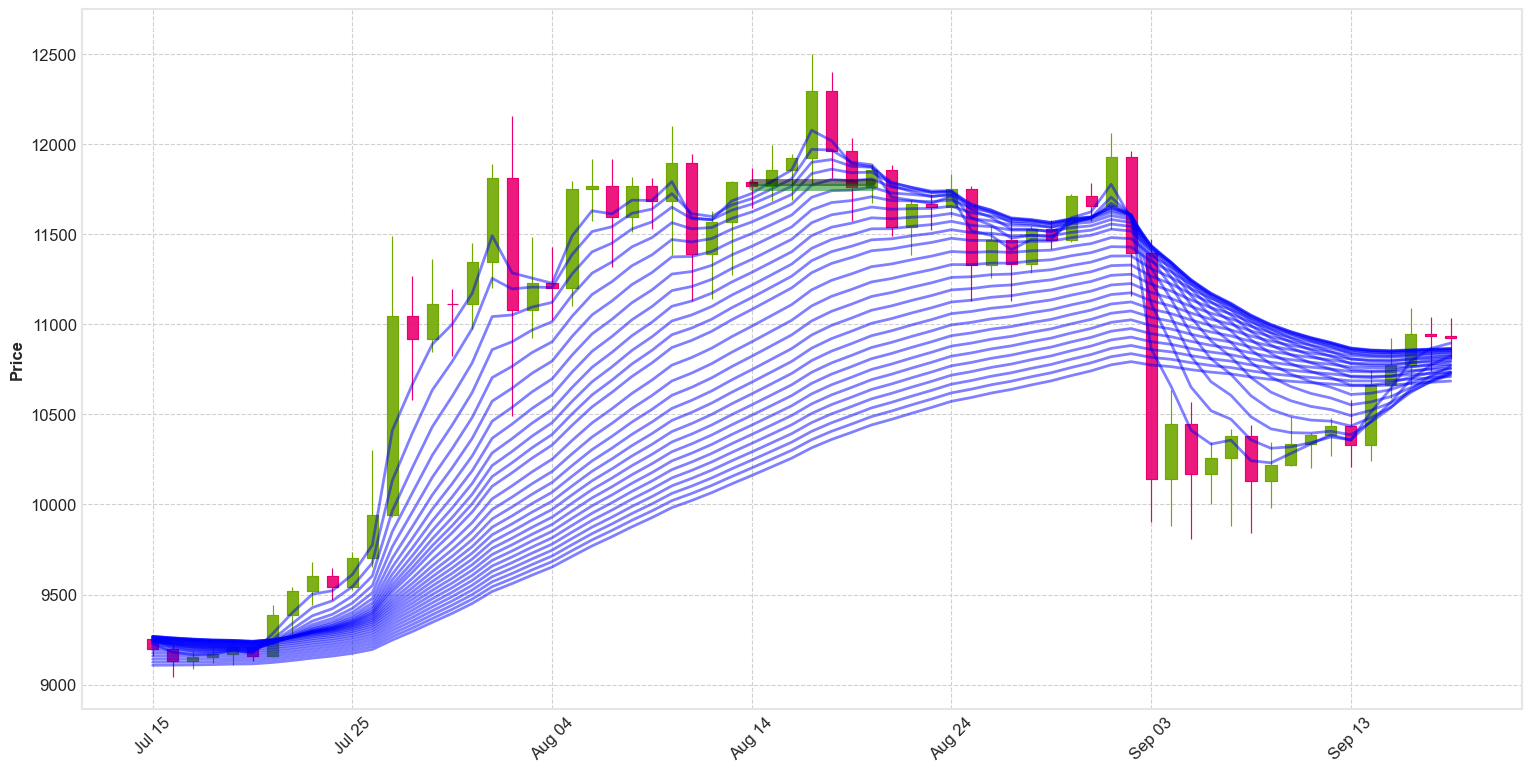

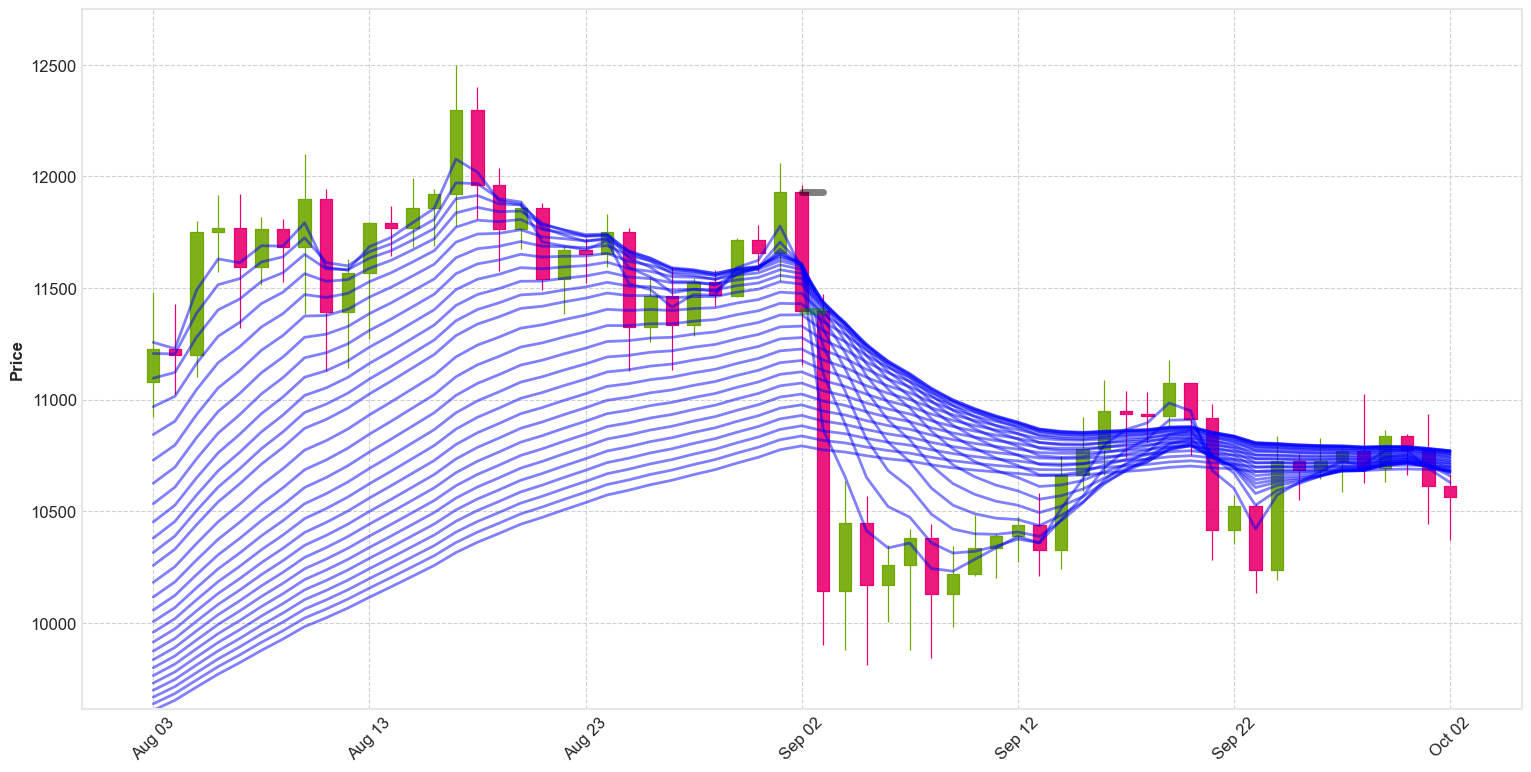

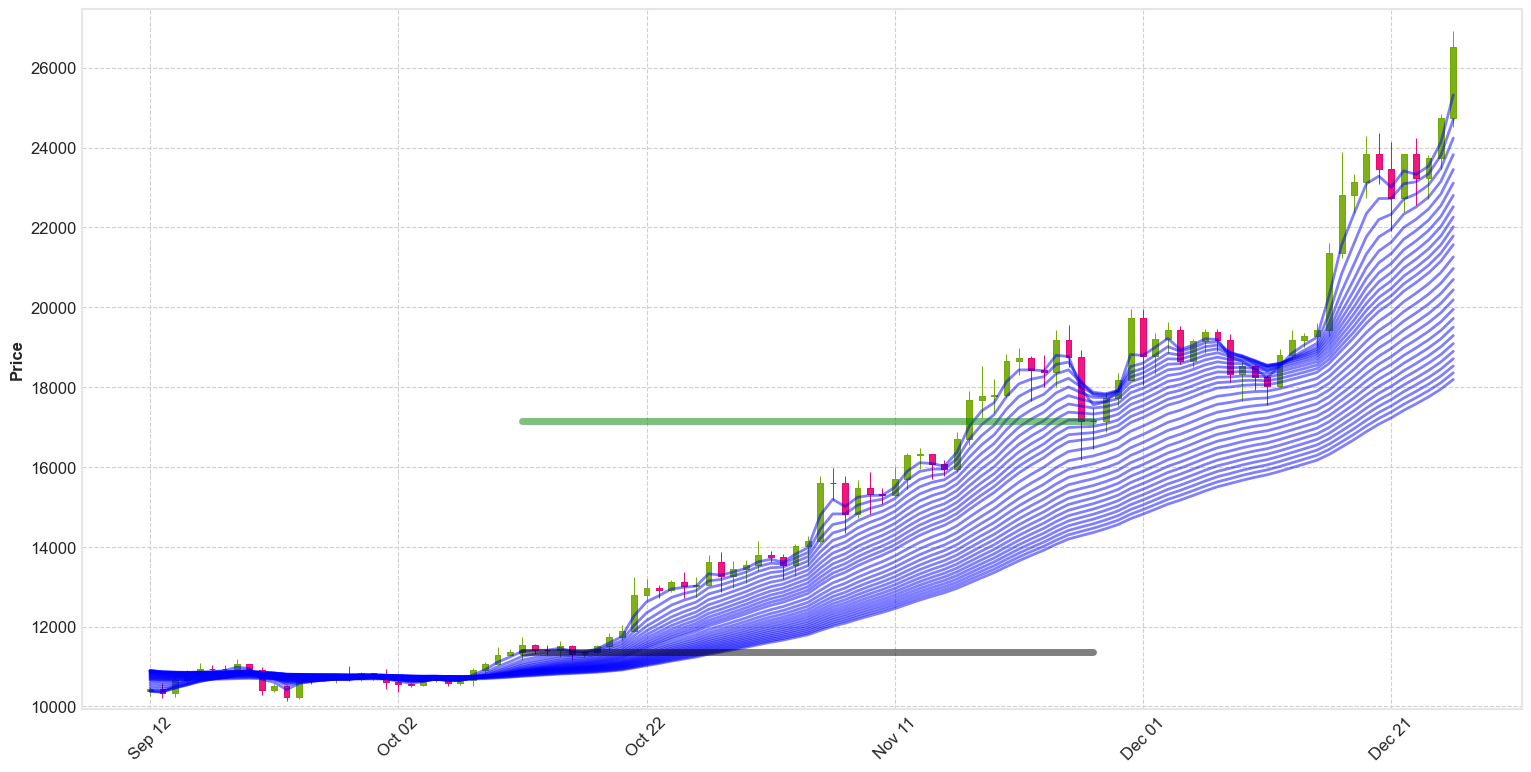

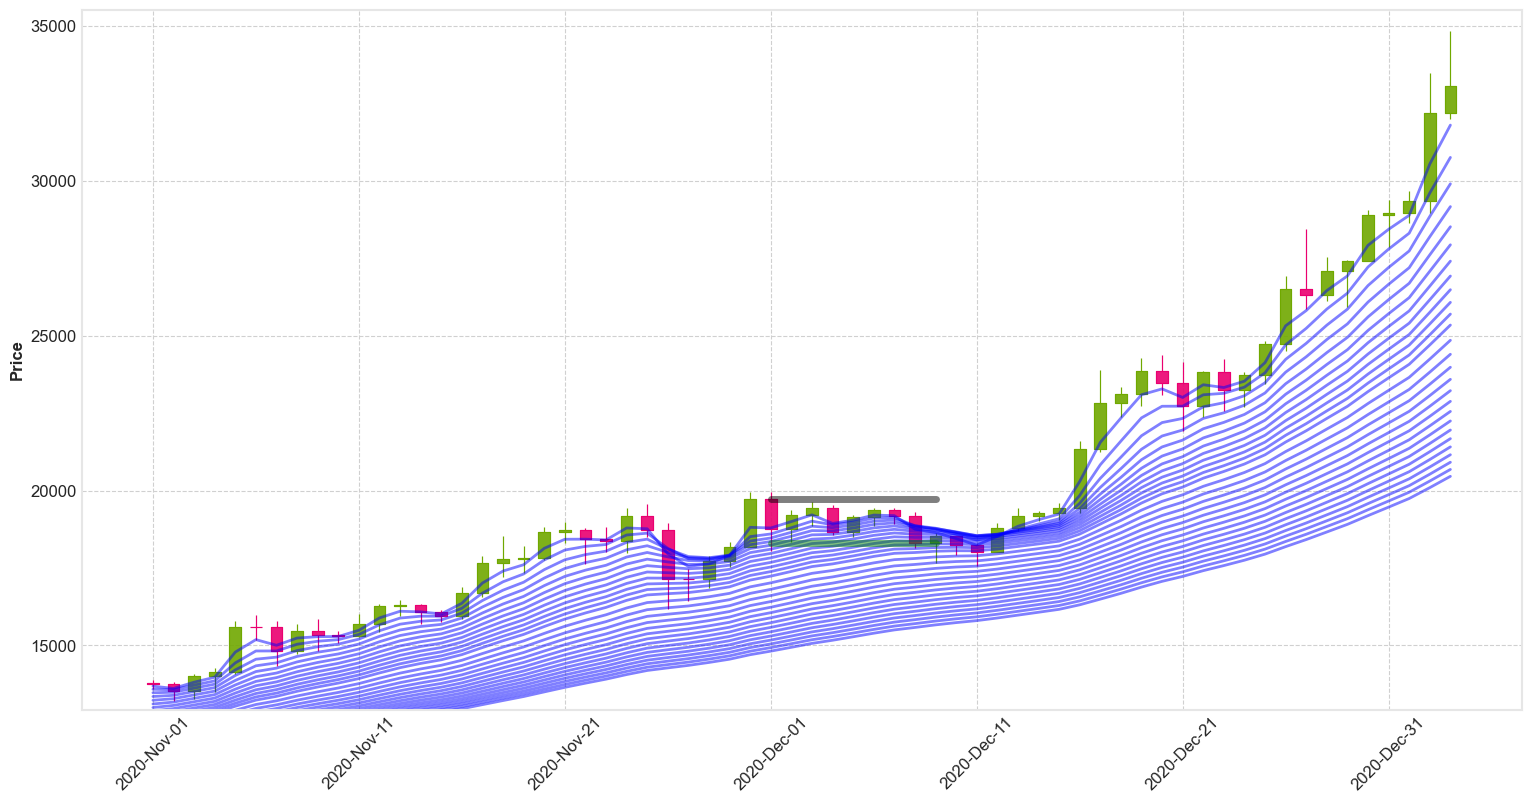

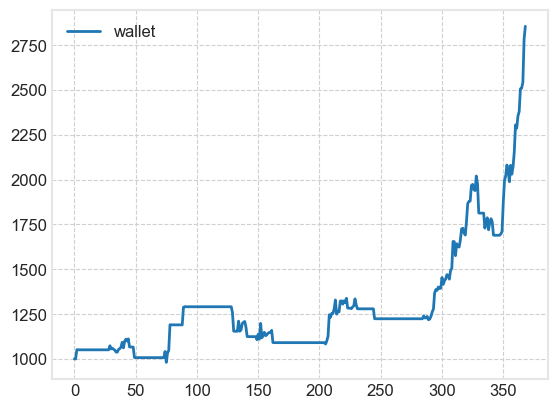

In [2]:
import os
import sys

import pandas as pd
from matplotlib import pyplot as plt
from tabulate import tabulate

sys.path.append(r"C:\Users\user\Desktop\Lab\strategy")  # Adds higher directory to python modules path.

from defenitions import CANDLES_DIR
from lom.local.data import LocalData
from lom.local.market import LocalMarket
from lom.local.pair import LocalPair
from lom.local.wallet import LocalWallet
from lom.model.constant import Interval
from lom.model.position import Position
from lom.util.performance_measures import PerformanceMeasures
from strategies.sma_cross import SmaCrossStrategy
from strategies.ha_trend import HeikinAshiTrend
from strategies.renko_trend import RenkoTrend
from strategies.bb_ma_trend import BbMaTrend
from strategy.strategies.ichimoku_trend import IchimokuIdeal
from strategy.strategies.rsi_divergence import RsiDivergence
from strategy.strategies.super_guppy_cross import SuperGuppyCross
from strategy.strategies.super_guppy_slope import SuperGuppySlope


if '__main__' == __name__:
    symbol = 'BTC-USDT'
    interval = Interval.DAY1
    sdf = pd.read_csv(os.path.join(CANDLES_DIR, symbol, '1d.csv'))[:485]
    sdf.timestamp = sdf.timestamp / 1000
    btcusdt = LocalPair(symbol=symbol, price_precision=2, quantity_precision=3, interval=interval, dataframe=sdf)

    data = LocalData([btcusdt])
    wallet = LocalWallet(initial_capital=1000)
    market = LocalMarket(data, wallet)

    # strategy = RenkoTrend(symbol, interval)
    # strategy = HeikinAshiTrend(symbol, interval)
    # strategy = BbMaTrend(symbol, interval)
    # strategy = RsiDivergence(symbol, interval)
    # strategy = IchimokuIdeal(symbol, interval)
    # strategy = SmaCrossStrategy(symbol, interval)
    strategy = SuperGuppyCross(symbol, interval)
    # strategy = SuperGuppySlope(symbol, interval)
    positions = market.backtest(strategy, show_tqdm=True, plot_backtest=True,
                                start_date='2020-1-1')

    headers = ['OPEN DATETIME', 'CLOSE DATETIME', 'SYMBOL', 'SIDE', 'LEVERAGE', 'TRADED QUANTITY', 'TRADED MARGIN',
               'OPEN PRICE', 'CLOSE PRICE', 'REALIZED PROFIT', 'FEE', 'PROFIT']
    values = [position.to_list() for position in positions]
    table = tabulate(values, headers=headers)
    print(table)

    performance_measures = PerformanceMeasures(strategy.interval, positions)
    print(performance_measures)
    print()

    data = pd.DataFrame(strategy.wallet_history)

    plt.figure()
    plt.plot(data, label='wallet')
    plt.legend()
    plt.show()

    # print(data)
